In [1]:
import os
import pandas as pd
import plotly.express as px
from datetime import datetime

In [2]:
pd.set_option('display.float_format','{:.2f}'.format)

DATA_PATH = os.path.join('..','datasets','raw','Superstore.csv')
store_df = pd.read_csv(DATA_PATH, parse_dates=['Order Date', 'Ship Date'])
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [3]:
store_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
# Setting 'Order Date' as index
store_df.set_index('Order Date', inplace=True)

# List of columns that I'll use
my_features = ['Sales','Discount','Profit']
super_df = store_df[my_features]
super_df

,Sales,Discount,Profit
Order Date,,,
2016-11-08,261.96,0.00,41.91
2016-11-08,731.94,0.00,219.58
2016-06-12,14.62,0.00,6.87
2015-10-11,957.58,0.45,-383.03
2015-10-11,22.37,0.20,2.52
...,...,...,...
2014-01-21,25.25,0.20,4.10
2017-02-26,91.96,0.00,15.63
2017-02-26,258.58,0.20,19.39


In [19]:
sales = super_df.groupby(super_df.index)['Sales'].sum()
sales

Order Date
2014-01-03     16.45
2014-01-04    288.06
2014-01-05     19.54
2014-01-06   4407.10
2014-01-07     87.16
               ...  
2017-12-26    814.59
2017-12-27    177.64
2017-12-28   1657.35
2017-12-29   2915.53
2017-12-30    713.79
Name: Sales, Length: 1237, dtype: float64

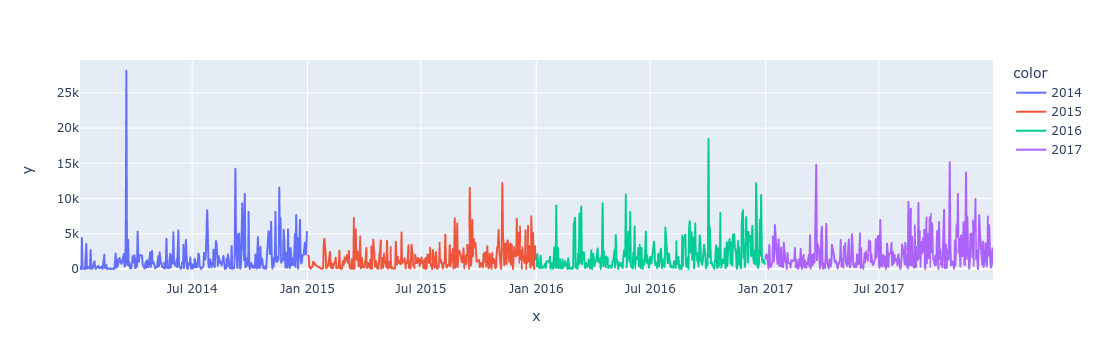

In [23]:
fig = px.line(x=sales.index, y=sales.values, line_group=sales.index.year, color=sales.index.year)
fig.show()